In [27]:
%matplotlib inline

import pandas as pd
import psycopg2
import matplotlib as mp
import matplotlib.pyplot as plt
import re
import numpy as np
from sklearn import linear_model

In [18]:
train = pd.read_csv("/Users/pablotempone/Google Drive/Maestria/Sistemas de Recomendacion/movilens800k/ratings_train.csv",sep = ',')

movie_actors = pd.read_csv("/Users/pablotempone/Google Drive/Maestria/Sistemas de Recomendacion/movilens800k/movie_actors.csv",sep = ',')
movie_countries = pd.read_csv("/Users/pablotempone/Google Drive/Maestria/Sistemas de Recomendacion/movilens800k/movie_countries.csv",sep = ',')
movie_directors = pd.read_csv("/Users/pablotempone/Google Drive/Maestria/Sistemas de Recomendacion/movilens800k/movie_directors.csv",sep = ',')
movie_genres = pd.read_csv("/Users/pablotempone/Google Drive/Maestria/Sistemas de Recomendacion/movilens800k/movie_genres.csv",sep = ',')
movie_imdb = pd.read_csv("/Users/pablotempone/Google Drive/Maestria/Sistemas de Recomendacion/movilens800k/movie_imdb.csv",sep = ',')
movie_locations = pd.read_csv("/Users/pablotempone/Google Drive/Maestria/Sistemas de Recomendacion/movilens800k/movie_locations.csv",sep = ',')
test = pd.read_csv("/Users/pablotempone/Google Drive/Maestria/Sistemas de Recomendacion/movilens800k/Copia de ratings_test.csv",sep = ',')

In [ ]:
train_merge = pd.merge(train,movie_countries,how='left',left_on='movieID',right_on='movieID')
train_merge = pd.merge(train_merge,movie_directors,how='left',left_on='movieID',right_on='movieID')

train_merge = train_merge.drop('directorID',axis = 1)


test_merge = pd.merge(test,movie_countries,how='left',left_on='movieID',right_on='movieID')
test_merge = pd.merge(test_merge,movie_directors,how='left',left_on='movieID',right_on='movieID')

test_merge = test_merge.drop('directorID',axis = 1)

total = train_merge.append(test_merge)

total = pd.get_dummies(total)


train_merge = pd.get_dummies(train_merge)

In [23]:
test_merge = pd.merge(test,movie_countries,how='left',left_on='movieID',right_on='movieID')

In [24]:
test_merge = pd.merge(test_merge,movie_directors,how='left',left_on='movieID',right_on='movieID')

In [25]:
test_merge = test_merge.drop('directorID',axis = 1)

test_merge = pd.get_dummies(test_merge)

(array([  12162.,   19336.,   16546.,   51495.,   56110.,  140146.,
         135626.,  194499.,   79722.,   64447.]),
 array([ 0.5 ,  0.95,  1.4 ,  1.85,  2.3 ,  2.75,  3.2 ,  3.65,  4.1 ,
         4.55,  5.  ]),
 <a list of 10 Patch objects>)

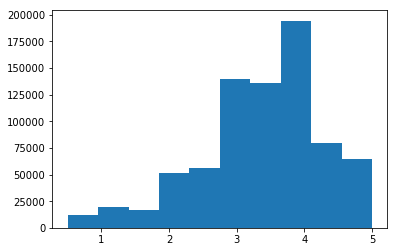

In [28]:
plt.hist(train['rating'], bins=10)

In [31]:
#ridge regression

reg = linear_model.RidgeCV(alphas=[0.1, 1.0,2.0,5.0,7.0,10.0])

#partir en train y test
from sklearn.model_selection import train_test_split


train_total, test_total = total[0:770088], total[770089:8555598]

del train_merge

train_df, test_df = train_test_split(train_total, test_size = 0.1)

del train_total

y = train_df.rating
x = train_df.drop('rating',axis = 1)


y_test = test_df.rating
x_test = test_df.drop('rating',axis = 1)

del train_df,test_df
del test_merge
del train,movie_actors,test,movie_locations
del total

In [32]:
reg.fit(x,y)

reg.coef_

reg.alpha_ 

prediccion = round(reg.predict(x_test),1)